In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import seaborn as sns
import scipy
from scipy.stats.stats import pearsonr
import pandas.util.testing as tm
from scipy.stats import spearmanr
import statsmodels.api as sm

In [3]:
df = pd.read_csv("19states_covidcases.csv", index_col = 0)
df.head()

,confirmed cases,(0-19)C,20-29,30-39,40-49,50-59,60-69,70-79,80+,(20-60)C,(60+)C,(0-19)P,(20-60)P,(60+)P
State,,,,,,,,,,,,,,
California,329162,31015,74003,64870,53279,47498,29954,15033,13113,239650,58100,10030953,21562379,7963713
Colorado,37686,3369,7409,6621,6169,5608,3769,2321,2382,25807,8472,1421155,3117551,1156858
Connecticut,47287,2112,5807,6707,6655,7956,6589,4434,6971,27125,17994,839423,1867472,865770
Illinois,153916,12431,26577,25311,26633,25346,17643,9805,10114,103867,37562,3195678,6740603,2804799
Maryland,74260,6401,11590,13905,12952,11467,8130,5119,4686,49914,17935,1491211,3226587,1324920


In [5]:
df.columns

Index(['confirmed cases', '(0-19)C', '20-29', '30-39', '40-49', '50-59',
       '60-69', '70-79', '80+', '(20-60)C', '(60+)C', '(0-19)P', '(20-60)P',
       '(60+)P'],
      dtype='object')

In [6]:
per_df = pd.DataFrame()
per_df['tot_pop'] = df['(0-19)C'] + df['(20-60)C']+df['(60+)C']
per_df['case_per'] = (df['confirmed cases']/per_df['tot_pop']) * 100
per_df

,tot_pop,case_per
State,,
California,328765,100.120755
Colorado,37648,100.100935
Connecticut,47231,100.118566
Illinois,153860,100.036397
Maryland,74250,100.013468
Massachusetts,111323,94.885154
Michigan,67962,102.098231
Minnesota,42720,98.972378
Mississippi,36672,96.583224


In [7]:
per_df['0-19'] = df['(0-19)C']/df['(0-19)P']
per_df['20-60'] = df['(20-60)C']/df['(20-60)P']
per_df['60+'] = df['(60+)C']/df['(60+)P']

per_df

,tot_pop,case_per,0-19,20-60,60+
State,,,,,
California,328765,100.120755,0.003092,0.011114,0.007296
Colorado,37648,100.100935,0.002371,0.008278,0.007323
Connecticut,47231,100.118566,0.002516,0.014525,0.020784
Illinois,153860,100.036397,0.003890,0.015409,0.013392
Maryland,74250,100.013468,0.004292,0.015470,0.013537
Massachusetts,111323,94.885154,0.003872,0.017696,0.024606
Michigan,67962,102.098231,0.000561,0.006421,0.013876
Minnesota,42720,98.972378,0.003575,0.010220,0.006167
Mississippi,36672,96.583224,0.004287,0.016203,0.013009


# Spearman Correlation

In [8]:
spearmanr(per_df['case_per'], per_df['0-19'])

SpearmanrResult(correlation=-0.11228070175438597, pvalue=0.6472068934597522)

In [9]:
spearmanr(per_df['case_per'], per_df['20-60'])

SpearmanrResult(correlation=-0.28421052631578947, pvalue=0.23829623657568158)

In [10]:
spearmanr(per_df['case_per'], per_df['60+'])

SpearmanrResult(correlation=-0.1701754385964912, pvalue=0.486099539787445)

# Machine Learning

# 0-19

In [6]:
x = df[['(0-19)C']]
y = df[['confirmed cases']]

In [7]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[31015.]
 [ 3369.]
 [ 2112.]
 [12431.]
 [ 6401.]
 [ 6104.]
 [ 1366.]
 [ 5156.]
 [ 3449.]
 [ 2425.]
 [ 2758.]
 [ 8880.]
 [ 5138.]
 [ 1580.]
 [ 1399.]
 [ 7848.]
 [ 9709.]
 [ 4065.]
 [ 4064.]]


In [8]:
y_arr = np.array(y).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
y_scaler = standardscaler.fit_transform(y_arr)
# print(y_scaler)

y_scaledback = standardscaler.inverse_transform(y_scaler)
print(y_scaledback)

[[329162.]
 [ 37686.]
 [ 47287.]
 [153916.]
 [ 74260.]
 [105629.]
 [ 69388.]
 [ 42281.]
 [ 35419.]
 [ 21172.]
 [ 27683.]
 [175298.]
 [ 66853.]
 [ 12438.]
 [ 17487.]
 [ 56648.]
 [ 65274.]
 [ 39218.]
 [ 36942.]]


# Train and Test Split

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Modeling

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
lm = LinearRegression()

In [13]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [14]:
print('Coefficients: \n', lm.coef_)


Coefficients: 
 [[0.92147628]]


# Predicting Test Data

In [15]:
predictions = lm.predict(x_test) # put x_test scale values

Text(0, 0.5, 'y_test')

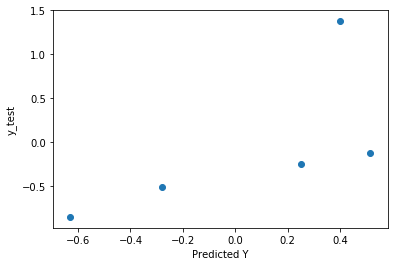

In [16]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating the model

In [17]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.5117558289704527
MSE: 0.34178221914089313
RMSE: 0.5846214323311224


# Residuals

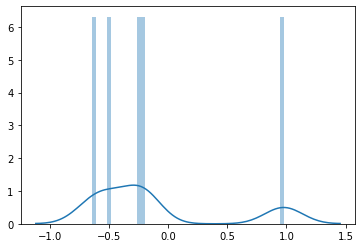

In [18]:
sns.distplot((y_test-predictions),bins=51);

# 20-60

In [19]:
x = df[['(20-60)C']]
y = df[['confirmed cases']]

In [20]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[239650.]
 [ 25807.]
 [ 27125.]
 [103867.]
 [ 49914.]
 [ 66142.]
 [ 32997.]
 [ 29893.]
 [ 24545.]
 [ 15448.]
 [ 19795.]
 [105961.]
 [ 43948.]
 [  8556.]
 [ 11017.]
 [ 35056.]
 [ 46908.]
 [ 26998.]
 [ 26229.]]


In [21]:
y_arr = np.array(y).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
y_scaler = standardscaler.fit_transform(y_arr)
# print(y_scaler)

y_scaledback = standardscaler.inverse_transform(y_scaler)
print(y_scaledback)

[[329162.]
 [ 37686.]
 [ 47287.]
 [153916.]
 [ 74260.]
 [105629.]
 [ 69388.]
 [ 42281.]
 [ 35419.]
 [ 21172.]
 [ 27683.]
 [175298.]
 [ 66853.]
 [ 12438.]
 [ 17487.]
 [ 56648.]
 [ 65274.]
 [ 39218.]
 [ 36942.]]


# Train and test split

In [22]:
from sklearn.model_selection import train_test_split

In [23]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Modeling

In [24]:
from sklearn.linear_model import LinearRegression

In [25]:
lm = LinearRegression()

In [26]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [27]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[1.12314489]]


# Predicting data

In [28]:
predictions = lm.predict(x_test) # put x_test scale values

Text(0, 0.5, 'y_test')

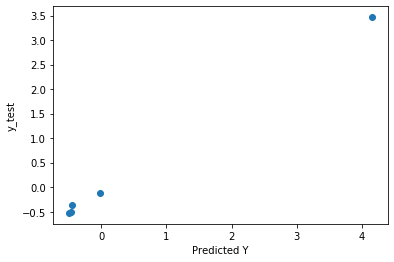

In [31]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating the model

In [30]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.18910600571364314
MSE: 0.0956482472304603
RMSE: 0.30927050818088087


# Residuals

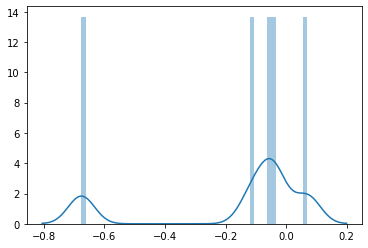

In [32]:
sns.distplot((y_test-predictions),bins=51);

# 60+

In [33]:
x = df[['(60+)C']]
y = df[['confirmed cases']]

In [34]:
from sklearn import preprocessing
import numpy as np

x_arr = np.array(x).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
x_scaler = standardscaler.fit_transform(x_arr)
# print(x_scaler)

x_scaledback = standardscaler.inverse_transform(x_scaler)
print(x_scaledback)

[[58100.]
 [ 8472.]
 [17994.]
 [37562.]
 [17935.]
 [39077.]
 [33599.]
 [ 7671.]
 [ 8678.]
 [ 3302.]
 [ 5530.]
 [59764.]
 [17707.]
 [ 2287.]
 [ 5072.]
 [ 9940.]
 [ 8488.]
 [ 9001.]
 [ 3658.]]


In [35]:
y_arr = np.array(y).reshape(-1,1)

standardscaler = preprocessing.StandardScaler()
y_scaler = standardscaler.fit_transform(y_arr)
# print(y_scaler)

y_scaledback = standardscaler.inverse_transform(y_scaler)
print(y_scaledback)

[[329162.]
 [ 37686.]
 [ 47287.]
 [153916.]
 [ 74260.]
 [105629.]
 [ 69388.]
 [ 42281.]
 [ 35419.]
 [ 21172.]
 [ 27683.]
 [175298.]
 [ 66853.]
 [ 12438.]
 [ 17487.]
 [ 56648.]
 [ 65274.]
 [ 39218.]
 [ 36942.]]


# Train and Test Split

In [36]:
from sklearn.model_selection import train_test_split

In [37]:
x_train, x_test, y_train, y_test= train_test_split(x_scaler,y_scaler)

# Moideling

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
lm = LinearRegression()

In [40]:
lm.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [41]:
print('Coefficients: \n', lm.coef_)

Coefficients: 
 [[0.9124599]]


# Predicting the data

In [42]:
predictions = lm.predict(x_test) # put x_test scale values

Text(0, 0.5, 'y_test')

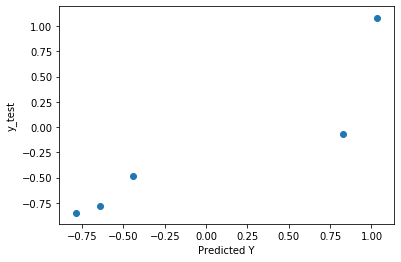

In [43]:
plt.scatter(predictions,y_test)
plt.xlabel('Predicted Y')
plt.ylabel('y_test')

# Evaluating the model

In [44]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:' ,metrics.mean_squared_error(y_test, predictions))
print('RMSE:',np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.23570390197593755
MSE: 0.16673275595051446
RMSE: 0.40832922495275115


# Residuals

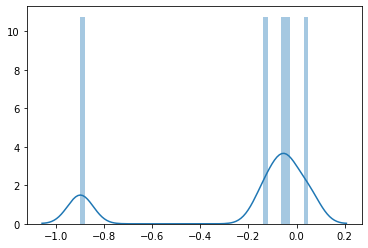

In [45]:
sns.distplot((y_test-predictions),bins=51);

# Spearmans Correlation

In [47]:
spearmanr(df['confirmed cases'], df['(0-19)C'])

SpearmanrResult(correlation=0.7298245614035088, pvalue=0.00038977247878890325)

In [48]:
spearmanr(df['confirmed cases'], df['(20-60)C'])

SpearmanrResult(correlation=0.9842105263157893, pvalue=3.177817784867256e-14)

In [49]:
spearmanr(df['confirmed cases'], df['(60+)C'])

SpearmanrResult(correlation=0.9245614035087718, pvalue=1.537993346223211e-08)

# OLS

In [50]:
import statsmodels.api as sm
import numpy as np

In [52]:
model = sm.OLS(df['confirmed cases'],df['(0-19)C'])
results = model.fit()
results.params
results.summary()

C:\Users\apurv\Anaconda3\lib\site-packages\scipy\stats\stats.py:1450: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=19
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        confirmed cases   R-squared (uncentered):                   0.930
Model:                            OLS   Adj. R-squared (uncentered):              0.926
Method:                 Least Squares   F-statistic:                              238.5
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                    7.90e-12
Time:                        14:12:55   Log-Likelihood:                         -221.30
No. Observations:                  19   AIC:                                      444.6
Df Residuals:                      18   BIC:                                      445.5
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
(0-19)C       11.1098      0.719     15.444      0.000       9.599      12.621
==============================================================================
Omnibus:                        5.999   Durbin-Watson:                   1.448
Prob(Omnibus):                  0.050   Jarque-Bera (JB):                3.521
Skew:                           0.953   Prob(JB):                        0.172
Kurtosis:                       3.905   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
model = sm.OLS(df['confirmed cases'],df['(20-60)C'])
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        confirmed cases   R-squared (uncentered):                   0.993
Model:                            OLS   Adj. R-squared (uncentered):              0.992
Method:                 Least Squares   F-statistic:                              2472.
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                    1.00e-20
Time:                        14:13:16   Log-Likelihood:                         -199.71
No. Observations:                  19   AIC:                                      401.4
Df Residuals:                      18   BIC:                                      402.4
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
(20-60)C       1.4504      0.029     49.720      0.000       1.389       1.512
==============================================================================
Omnibus:                        4.608   Durbin-Watson:                   1.410
Prob(Omnibus):                  0.100   Jarque-Bera (JB):                2.657
Skew:                           0.359   Prob(JB):                        0.265
Kurtosis:                       4.686   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [54]:
model = sm.OLS(df['confirmed cases'],df['(60+)C'])
results = model.fit()
results.params
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:        confirmed cases   R-squared (uncentered):                   0.891
Model:                            OLS   Adj. R-squared (uncentered):              0.885
Method:                 Least Squares   F-statistic:                              147.3
Date:                Thu, 16 Jul 2020   Prob (F-statistic):                    4.21e-10
Time:                        14:13:20   Log-Likelihood:                         -225.48
No. Observations:                  19   AIC:                                      453.0
Df Residuals:                      18   BIC:                                      453.9
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
(60+)C         3.8432      0.317     12.135      0.000       3.178       4.509
==============================================================================
Omnibus:                        8.263   Durbin-Watson:                   1.255
Prob(Omnibus):                  0.016   Jarque-Bera (JB):                6.639
Skew:                           0.750   Prob(JB):                       0.0362
Kurtosis:                       5.477   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""